DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

Problem Statement:  
Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 
You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

In [1]:
# load data
import pandas as pd
data = pd.read_csv('TwitterHate.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [25]:
# text clean up
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
import re
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
words = set(nltk.corpus.words.words())
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
data['cleaned_tweet'] = data['tweet']\
.apply(lambda x : ' '.join\
 ([lemmatizer.lemmatize\
  (word.lower()) \
  for word in word_tokenize\
  (re.sub(r'([^\s\w]|_)+', ' ',\
   str(x))) if word not in stop_words])) 

In [5]:
data[['cleaned_tweet', 'tweet', 'label']]

,cleaned_tweet,tweet,label
0,user father dysfunctional selfish drag kid dys...,@user when a father is dysfunctional and is s...,0
1,user user thanks lyft credit use cause offer w...,@user @user thanks for #lyft credit i can't us...,0
2,bihday majesty,bihday your majesty,0
3,model love take time urð ð ð ð ð ð ð ð,#model i love u take with u all the time in ...,0
4,factsguide society motivation,factsguide: society now #motivation,0
...,...,...,...
31957,ate user isz youuu ð ð ð ð ð ð ð ð ð â ï,ate @user isz that youuu?ðððððð...,0
31958,see nina turner airwave trying wrap mantle gen...,to see nina turner on the airwaves trying to...,0
31959,listening sad song monday morning otw work sad,listening to sad songs on a monday morning otw...,0
31960,user sikh temple vandalised calgary wso condem...,"@user #sikh #temple vandalised in in #calgary,...",1


In [6]:
# remove terms with a length of 1
data['extra_cleanup_tweet'] = data['cleaned_tweet']\
.apply(lambda x : ' '.join\
 ([lemmatizer.lemmatize\
  (word.lower()) \
  for word in word_tokenize\
  (re.sub(r'\b\w{1}?\b', ' ',\
   str(x)))]))
#re.sub(r'\b\w{1}\b', ' ', c)

In [7]:
data[['extra_cleanup_tweet', 'cleaned_tweet', 'tweet', 'label']]

,extra_cleanup_tweet,cleaned_tweet,tweet,label
0,user father dysfunctional selfish drag kid dys...,user father dysfunctional selfish drag kid dys...,@user when a father is dysfunctional and is s...,0
1,user user thanks lyft credit use cause offer w...,user user thanks lyft credit use cause offer w...,@user @user thanks for #lyft credit i can't us...,0
2,bihday majesty,bihday majesty,bihday your majesty,0
3,model love take time urð,model love take time urð ð ð ð ð ð ð ð,#model i love u take with u all the time in ...,0
4,factsguide society motivation,factsguide society motivation,factsguide: society now #motivation,0
...,...,...,...,...
31957,ate user isz youuu,ate user isz youuu ð ð ð ð ð ð ð ð ð â ï,ate @user isz that youuu?ðððððð...,0
31958,see nina turner airwave trying wrap mantle gen...,see nina turner airwave trying wrap mantle gen...,to see nina turner on the airwaves trying to...,0
31959,listening sad song monday morning otw work sad,listening sad song monday morning otw work sad,listening to sad songs on a monday morning otw...,0
31960,user sikh temple vandalised calgary wso condem...,user sikh temple vandalised calgary wso condem...,"@user #sikh #temple vandalised in in #calgary,...",1


In [8]:
df_tweet_list = data['extra_cleanup_tweet'].values.tolist()
#print(df_tweet_list)

In [9]:
token_list = ' '.join(df_tweet_list)

In [10]:
#print(token_list)

In [11]:
# Tokenize using work_tokenize()
def get_text_tokens(text):
    tokens = word_tokenize(text)
    return tokens
get_text_tokens(token_list)

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drag',
 'kid',
 'dysfunction',
 'run',
 'user',
 'user',
 'thanks',
 'lyft',
 'credit',
 'use',
 'cause',
 'offer',
 'wheelchair',
 'van',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'take',
 'time',
 'urð',
 'factsguide',
 'society',
 'motivation',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'dispute',
 'get',
 'allshowandnogo',
 'user',
 'camping',
 'tomorrow',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'dannyâ',
 'next',
 'school',
 'year',
 'year',
 'exam',
 'think',
 'school',
 'exam',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champion',
 'cleveland',
 'clevelandcavaliers',
 'user',
 'user',
 'welcome',
 'gr8',
 'ireland',
 'consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'previous',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'standwithorlando',
 

In [12]:
from collections import Counter
token_list = get_text_tokens(token_list)
counter = Counter(token_list)
counter.most_common(10)

[('user', 17582),
 ('day', 2804),
 ('love', 2801),
 ('amp', 1776),
 ('happy', 1687),
 ('time', 1249),
 ('life', 1225),
 ('today', 1090),
 ('like', 1082),
 ('get', 1000)]

In [13]:
# TFIDF vectorizer with 5000 max features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=5000)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data['extra_cleanup_tweet']).todense()) # todense() creates matrix
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,000,01,039,05,06,08,10,100,1000,...,¾â,¾ï,¾ð,à¹,ä¹,êµ,ï¼,ï½,ð¾ð,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# training and validation sets.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split\
                                     (tfidf_df, data['label'],\
                                      test_size=0.2, \
                                      random_state=42, \
                                      stratify=data['label'])

In [16]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((25569, 5000), (6393, 5000), (25569,), (6393,))

In [17]:
# classifier method
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train, y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1]
    return [predicted_labels, predicted_probab, model]

In [30]:
# model evaluation method
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    # confusion matrix
    cfn_mat = confusion_matrix(actual_values, predicted_values)
    print("confusion matrix:",cfn_mat)
    print("\naccuracy:",accuracy_score(actual_values, predicted_values))
    print("\nclassification report:",classification_report(actual_values, predicted_values))
    fpr,tpr,threshold = roc_curve(actual_values,predicted_probabilities)
    print("\nArea under ROC curve for validation set:",auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [19]:
logreg_results = clf_model(logreg, X_train, y_train, X_valid)

#### 9 - Model Evaluation

confusion matrix: [[5931   14]
 [ 286  162]]

accuracy: 0.9530736743312999

classification report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98      5945
           1       0.92      0.36      0.52       448

    accuracy                           0.95      6393
   macro avg       0.94      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393


Area under ROC curve for validation set: 0.946006172654091


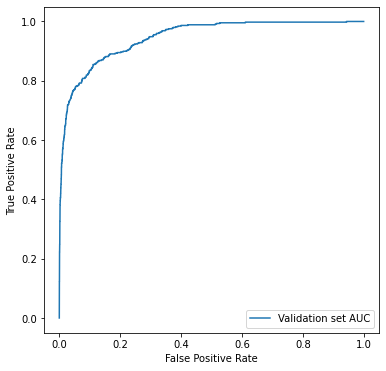

In [29]:
# actual values, pred values, pred probab
model_evaluation(y_valid, logreg_results[0], logreg_results[1])

Recall on training set for 0 (non-hate) label is 1 (perfect) which means we are overfitting.

#### 10 - Deal with class imbalance
Model is focussing on the 0s

In [35]:
final_df = data[['extra_cleanup_tweet', 'label']]
final_df.shape

(31962, 2)

In [36]:
final_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [37]:
# find the indexes of the minority dataset where the label is 1
ind = final_df[final_df['label']==1].index # collection of records where label is 1.
print(len(ind))

2242


In [38]:
# Separate by the minority class
minData = final_df.loc[ind]
print(minData.shape)

(2242, 2)


In [39]:
# indexes of the majority class; where label is 0.
ind0 = final_df[final_df['label']==0].index 
print(len(ind0))

29720


In [40]:
# Separate by the minority class
majData = final_df.loc[ind0]
print(majData.shape)

(29720, 2)


In [42]:
# random sample equal to the length of the minority class to make the dataset balanced.
majSample = majData.sample(n=len(ind),random_state = 123)

In [44]:
majSample.shape, minData.shape

((2242, 2), (2242, 2))

In [45]:
# prepare the new training data
balData = pd.concat([minData,majSample],axis = 0) # concatenation is happening in the vertical direction

# shuffle dataset
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,extra_cleanup_tweet,label
30788,height time fly japan2016 familytrip,0
18681,lucky positive affirmation,0
8035,booked reading susan soon stanton newplay kilo...,0
22342,nothing would dangerous give putinschoice impr...,1
9813,user stunning response plan nominate muslimbro...,1


In [46]:
# TFIDF vectorizer with 5000 max features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=5000)
tfidf_bal_df = pd.DataFrame(tfidf_model.fit_transform(balData['extra_cleanup_tweet']).todense()) # todense() creates matrix
tfidf_bal_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_bal_df.head()

,000,06,08,10,100,1000x,11,12,1200,13,...,å½,æ²,êµ,ì¹,ï¼,ðµð,ðµñ,ðºð,ð¾ð,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# training and validation sets using balanced dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split\
                                     (tfidf_bal_df, balData['label'],\
                                      test_size=0.2, \
                                      random_state=42, \
                                      stratify=balData['label'])

#### 11 - Model Training & Evaluation

In [48]:
logreg_results2 = clf_model(logreg, X_train, y_train, X_valid)

confusion matrix: [[400  49]
 [ 55 393]]

accuracy: 0.8840579710144928

classification report:               precision    recall  f1-score   support

           0       0.88      0.89      0.88       449
           1       0.89      0.88      0.88       448

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897


Area under ROC curve for validation set: 0.9479274379573656


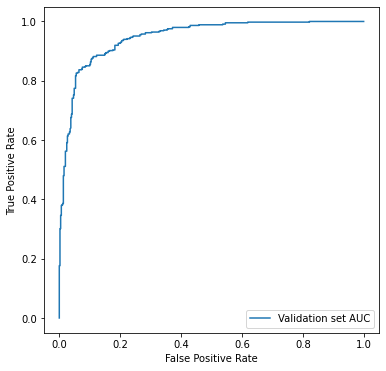

In [49]:
# actual values, pred values, pred probab
model_evaluation(y_valid, logreg_results2[0], logreg_results2[1])

#### 12 - Regularization and Hyperparameter tuning